## Q2

### Part A

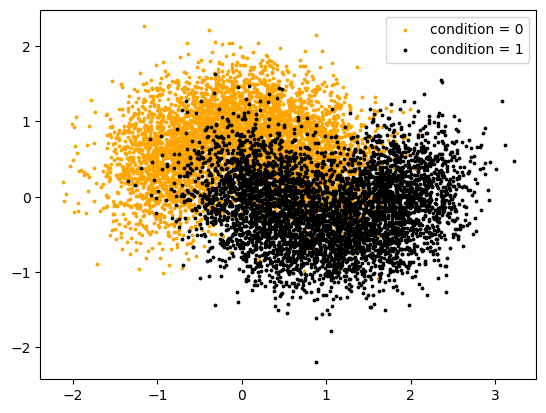

In [45]:
import numpy as np
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

M, condition = make_moons(n_samples=10000, noise=0.4)
x1_value_handler = np.where(condition == 1)[0]
second_col = M[x1_value_handler]
x0_value_handler = np.where(condition == 0)[0]
first_col = M[x0_value_handler]
plt.scatter(first_col[:, 0], first_col[:, 1], s=3, c='orange',label = "condition = 0")
plt.scatter(second_col[:, 0], second_col[:, 1], s=3, c='black',label = 'condition = 1')
plt.legend()
plt.show()


### Part B

In [46]:
from sklearn.model_selection import train_test_split
Xdim_for_train, Xdim_for_test, ydim_for_train, ydim_for_test = train_test_split(M,
                                                    condition, test_size=0.2, random_state=10)
#(test size = 0.2)

### Part C

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_depth': [1, 8, 10, 15, 19, 25, 45,55,65,75,85,95,110],
              'max_leaf_nodes': [10, 20, 30, 40, 50, 60, 70, 80]}
check = DecisionTreeClassifier(random_state=2000)
solver = GridSearchCV(check, param_grid, cv=5).fit(Xdim_for_train, ydim_for_train)
print(solver.best_estimator_)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=20, random_state=2000)


### Part D

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
best_model = DecisionTreeClassifier(max_depth=solver.best_estimator_.max_depth,
                                    max_leaf_nodes=solver.best_estimator_.max_leaf_nodes)
best_model.fit(Xdim_for_train, ydim_for_train)
predict_val = best_model.predict(Xdim_for_test)
C_matrix = confusion_matrix(ydim_for_test, predict_val)
print("confusion_matrix: \n",C_matrix[0,:],'\n',C_matrix[1,:])
print(f"____________________________ \n Accuracy_score: {accuracy_score(ydim_for_test, predict_val)} \n ___________________________")


confusion_matrix: 
 [908 133] 
 [162 797]
____________________________ 
 Accuracy_score: 0.8525 
 ___________________________


### Part E

In [49]:
import random
X, y = make_moons(n_samples=100000)
Tree = []
predict_val = []
x_train_subsets_ = []
y_train__subsets_ = []
for i in range(1000):
    #containing 100 instances selected randomly
    array_handler = random.sample(range(len(Xdim_for_train)), 100)
    x_train_subsets_.append(X[array_handler])
    y_train__subsets_.append(ydim_for_train[array_handler])


### Part F&G

In [50]:
from scipy.stats import mode
from sklearn.base import clone
accuracy_score_array = []
model = DecisionTreeClassifier(max_depth=solver.best_estimator_.max_depth, max_leaf_nodes=solver.best_estimator_.max_leaf_nodes)
for i in range(len(x_train_subsets_)):
    Tree.append(clone(model))
    Tree[i].fit(x_train_subsets_[i],y_train__subsets_[i])
    predict_val.append(Tree[i].predict(Xdim_for_test))
    accuracy_score_array.append(accuracy_score(ydim_for_test, predict_val[i]))
#keep only the most frequent prediction
best_index_in_prediction = mode(predict_val,keepdims=True)[0][0]



## Part H

In [54]:
print(accuracy_score(ydim_for_test, best_index_in_prediction))

0.4345
